## 实验报告1

#### 1 实验目的

本次实验通过拍照和分析照片参数等手段，研究相机参数与拍摄图像像素灰度的关系。其中相机参数主要体现为以下两个指标：

​	1. 曝光时间

​	2. 增益

最后建立数学模型，通过图像描述和函数拟合等方式说明结论。

#### 2 背景知识

##### 2.1 曝光时间

工业相机工作过程中，曝光(exposure)是图像传感器进行感光的过程。而曝光时间(exposure time)，又称快门速度(shutter speed)，直接控制到达传感器的光量：曝光时间越长，累计的光电荷越多，图像亮度就越大。



##### 2.2 增益

在模数转换之前，感测信号通常由感测放大器增强。增益衡量的是输出与输入的信号幅度大小，以分贝（$$dB$$）为单位，计算方法为
$$
dB = 10 log_{10}(\frac{n_1}{n_2})
$$
从理论上讲，更高的增益可以让相机在低光照条件下表现更好（当光圈已经最大化时，由于长时间曝光导致运动模糊更少）。然而，在实践中，较高的增益既会提高亮度，又会放大传感器噪声。



##### 2.3 噪声探测

图像噪声在空间域中体现为某几个像素点与周围像素点的通道值相差很大，在视觉感知上体现为很多细小的噪声点分布在图像上。通过观察，本实验所捕获的图像噪声主要表现为高斯噪声和雪花噪声，其中高斯噪声，或者噪点，体现为某一个像素点与周围像素点的通道值相差较大；雪花噪声体现为图像的某个区域与周围区域的通道值相差较大。因此可以通过比较某一点的像素通道值与它的邻域信息，确定是否为噪声。

具体的比较方法采用均方误差法。

********此处添加均方误差公式

#### 3 实验器材

拍摄器材: Dual Basler Dart Machine Vision USB3 Color Cameras + Lens

参数调试软件：pylon Viewer

数据处理工具：Microsoft Excel, OpenCV，Python

#### 4 实验步骤

照片拍摄

固定相机和被拍摄物体，用USB数据线连接相机和电脑，调整相机焦距使被拍摄物体清晰成像。

在pylon Viewer软件上取消白平衡、曝光时间和增益的自动调整，开始拍摄系列照片。在保持曝光时间不变的情况下，多次改变增益的值拍摄照片；再在固定的增益下，拍摄不同曝光时间的照片。



噪声检测

对得到的多组图片进行噪声检测。由于在图像上，物体边缘处同样会出现通道值突变，为了避免物体边缘与真正的噪声一并被归入噪声之列，同时充分利用所有照片中被拍摄物体位置不变的特性，特选择所有照片的处于同样位置的被拍摄物体所在区域进行噪声检测。该区域不包括物体边缘，因此通道值突变只有出现噪声一种可能性。

检测高斯噪点时，对于区域内的某一像素，计算该像素与它周围8个像素的均方误差。再与设定好的阈值比较，若大于阈值则视为噪点。统计区域内噪点的个数，结果以噪点个数与区域内像素数之比记录。



#### 5 分析与结论
本实验使用了python的curve_fitting函数（scipy库）进行了二元函数的拟合。
从下图中可以看出，像素的灰度值随着gain(dB)和exposure(microsecond)的增大而增大，而且近似成线性，所以使用了线性的函数来进行拟合，拟合结果为$$y=3.65161728e+00x_1+1.05649243e-03x_2+1.17595570e+01$$。但是预测继续gain和exposu继续增大后像素灰度值增长会放缓，我们数据采集的区间不是很好，所以只能说明在灰度（或者像素RGB通道）值较低的时候成大致的线性关系。

并且照片中噪点的比例也随着gain(dB)和exposure(microsecond)的增大而增大，而且增长速度也随着gain(dB)和exposure(microsecond)的增大而增大。故采用二次函数来进行拟合，拟合结果为$$y= 1.69630032e-04{x_1}^2+-5.75219161e-13{x_2}^2+5.14436483e-03$$。发现综合来看噪点比例随着exposure的增大而变小，观察三维图，发现噪点的变化规律比较复杂，二次函数可能并不能很好进行拟合。但由于时间和水平限制，就没有继续拟合了。


#### 6 参考资料

http://www.doc88.com/p-2572496212147.html
https://www.cnblogs.com/ljy1227476113/p/12171379.html
https://stackoverflow.com/questions/56439930/how-to-use-the-datasets-to-fit-the-3d-surface





In [1]:
from calendar import c
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys

Text(0.5, 0, 'grayscale value')

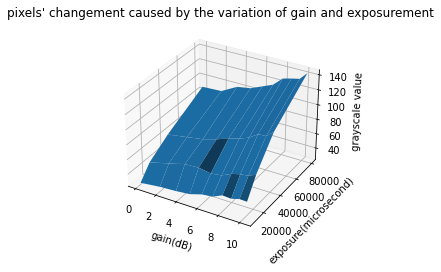

In [2]:
####basic part
##########  NOTE：程序开始会显示选中的像素点周围的图像，按任意键关闭窗口。不按键的话会一直等待输入
##get pixel

index = [1100,1200]##get a fixed pixel in a image
pixels=[]
exposure_list=[10000*(2**x) for x in range(4)]
gain_list=[0,1.9382,3.521825,4.860761,6.0206,7.04365,7.9588,8.786654,9.542425,10.237667]
count = 0
for exposure in exposure_list:
    for gain in gain_list:
        picture=cv2.imread("pictures/{}_{}.bmp".format(exposure,gain))
        pixel=picture[index[0],index[1]]
        pixels.append(pixel)
        local_pic=picture[index[0]-10:index[0]+10,index[1]-10:index[1]+10]
        if count % len(gain_list)/2 == 0:
            cv2.namedWindow('local_{}_{}'.format(exposure,gain),cv2.WINDOW_NORMAL) 
            cv2.imshow('local_{}_{}'.format(exposure,gain),local_pic)
            cv2.waitKey()
            cv2.destroyAllWindows() 
        count+=1

pixels=np.array(pixels).reshape(len(exposure_list),len(gain_list),3)
pixels_grey = pixels[:,:,0] * 0.114 + pixels[:,:,1] * 0.587 + pixels[:,:,2] * 0.299
##visualize
xv, yv = np.meshgrid(np.array(gain_list),np.array(exposure_list))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title("pixels' changement caused by the variation of gain and exposurement")
ax.plot_surface(xv,yv,pixels_grey)
ax.set_xlabel("gain(dB)")
ax.set_ylabel("exposure(microsecond)")
ax.set_zlabel("grayscale value")




Text(0.5, 0, 'noise points portion')

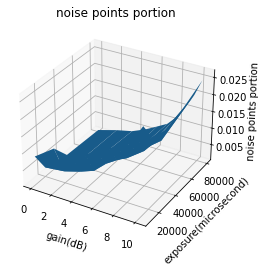

In [3]:
####bonus part
####credit:https://www.cnblogs.com/ljy1227476113/p/12171379.html
thresh=8
ab_levels=[]
for exposure in exposure_list:
    for gain in gain_list:
        im=cv2.imread("pictures/{}_{}.bmp".format(exposure,gain))
        height=im.shape[0]#尺寸
        width=im.shape[1]
        #print(height,width)
        num=0
        for i in range(600,900,3):#height-height%3,3):
            for j in range(1050,1400,3):#width-width%3,3):
                x=(int(im[i][j][2])+int(im[i+1][j][2])+int(im[i+2][j][2])+int(im[i][j+1][2])+int(im[i+1][j+1][2])+int(im[i+2][j+1][2])+int(im[i][j+2][2])+int(im[i+1][j+2][2])+int(im[i+2][j+2][2]))/9
                x2=(pow(im[i][j][2],2)+pow(im[i+1][j][2],2)+pow(im[i+2][j][2],2)+pow(im[i][j+1][2],2)+pow(im[i+1][j+1][2],2)+pow(im[i+2][j+1][2],2)+pow(im[i][j+2][2],2)+pow(im[i+1][j+2][2],2)+pow(im[i+2][j+2][2],2))/9
                var=x2-pow(x,2)
                if var>thresh:
                    num+=1
        ab_level=num/(300*350)
        ab_levels.append(ab_level)
ab_levels=np.array(ab_levels).reshape(len(exposure_list),len(gain_list))
fig_noise = plt.figure()
ax_noise = fig_noise.add_subplot(projection='3d')
ax_noise.set_title("noise points portion")
ax_noise.plot_surface(xv,yv,ab_levels)
ax_noise.set_xlabel("gain(dB)")
ax_noise.set_ylabel("exposure(microsecond)")
ax_noise.set_zlabel("noise points portion")

params1 [3.65161728e+00 1.05649243e-03 1.17595570e+01]
params2 [ 1.69630032e-04 -5.75219161e-13  5.14436483e-03]


Text(0.5, 0, 'noise points portion')

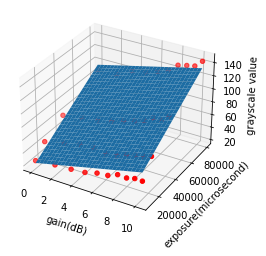

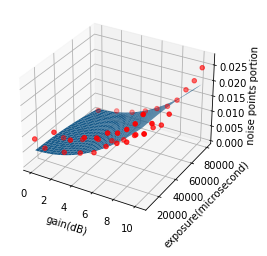

In [5]:
##function fitting
import scipy.optimize as optimize

def func_linear(data,a,b,c):
    return a*data[0]+b*data[1]+c

def func_qua(data,a,b,c):
    return a*(data[0]**2)+b*(data[1]**2)+c

x_data=xv.flatten()
y_data=yv.flatten()
z_data1=pixels_grey.flatten()
z_data2=ab_levels.flatten()
params1, pcov1 = optimize.curve_fit(func_linear, [x_data,y_data], z_data1)
params2, pcov2 = optimize.curve_fit(func_qua, [x_data,y_data], z_data2)
print("params1",params1)
print("params2",params2)

# draw the fitting function
model_x_data = np.linspace(min(x_data), max(x_data), 30)
model_y_data = np.linspace(min(y_data), max(y_data), 30)
X, Y = np.meshgrid(model_x_data, model_y_data)
Z1 = func_linear(np.array([X, Y]), *params1)
Z2 = func_qua(np.array([X, Y]), *params2)

fig_fit1 = plt.figure()
ax_fit1 = fig_fit1.add_subplot(projection='3d')
ax_fit1.plot_surface(X, Y, Z1)
ax_fit1.scatter(x_data, y_data, z_data1, color='red')
ax_fit1.set_xlabel("gain(dB)")
ax_fit1.set_ylabel("exposure(microsecond)")
ax_fit1.set_zlabel("grayscale value")
fig_fit2 = plt.figure()
ax_fit2 = fig_fit2.add_subplot(projection='3d')
ax_fit2.plot_surface(X, Y, Z2)
ax_fit2.scatter(x_data, y_data, z_data2, color='red')
ax_fit2.set_xlabel("gain(dB)")
ax_fit2.set_ylabel("exposure(microsecond)")
ax_fit2.set_zlabel("noise points portion")